# Predict Customer Churn of a Telecom company 

* The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

For Telco companies, it is key to attract new customers and at the same time avoid contract terminations (=churn) to grow their revenue-generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example, better price offers, more attractive packages, bad service experiences or changes in customers’ situations.<br></br>
Churn analytics provides valuable capabilities to predict customer churn and also define the underlying reasons that drive it. The churn metric is mostly shown as the percentage of customers that cancel a product or service within a given period (mostly months). Suppose a Telco company had 10 Mio. customers on the 1st of January and received 500K contract terminations until the 31st of January; the monthly churn for January would be 5%.<br></br>
Telcos apply machine learning models to predict churn on an individual customer basis and take countermeasures such as discounts, special offers or other gratifications to keep their customers. A customer churn analysis is a typical classification problem within the domain of supervised learning.<br></br>

__Problem Statement__
- Find out the key drivers that lead to Churn.
- This could help company to make some changes in pricing and planing to avoid customer from churning.
- We are tasked with predicting whether a given customer is going to churn or not. 

<h1>2. Machine Learning Probelm </h1>

<h3> 2.1.1 Data Overview </h3>

<p>
- Data will be in .csv format.<br>
- There are two separate files *Telecom_Train.csv* and *Telecom_Test.csv*<br>
- Dataset contains # of columns.<br>
- Train dataset contains # rows.<br>
- Test dataset contains # of rows.<br>
</p>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem; for a given set of features, we need to predict if a customer is going to churn or not </p>

<h3> 2.2.2 Performance Metric </h3>

Metric(s): 

* Metric 1

* Metric 2

<h2> 2.3 Train and Test Construction </h2>

<h1>3. Exploratory Data Analysis </h1>

<h3> Loading necessary libraries </h3>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [2]:
#reading the required data files
trainer = pd.read_csv('Telecom_Train.csv')
tester = pd.read_csv('Telecom_Test.csv')

In [3]:
trainer.head()

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    KS             128  area_code_415                 no   
1           2    OH             107  area_code_415                 no   
2           3    NJ             137  area_code_415                 no   
3           4    OH              84  area_code_408                yes   
4           5    OK              75  area_code_415                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churn  
0                              1     no  
1                              1     no  
2                              0     no  
3                              2     no  
4                              3     no  

[5 rows x 21 columns]

In [4]:
#checking the shape of test and train data
print("Train data dimension:{}".format(trainer.shape) )
print('Test data dimension:{}'.format(tester.shape))

Train data dimension:(3333, 21)
Test data dimension:(1667, 21)


In [5]:
#checking test to train data ratio
tester.shape[0]/trainer.shape[0] *100

50.015001500150014

- Out of all the data available **66%** of data is in training data and **33%** of data is in test data

In [6]:
#name of all the columns present in dataset
trainer.columns.values

array(['Unnamed: 0', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'], dtype=object)

In [7]:
#checking the datatype of each columns
trainer.dtypes.sort_values()

Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object

- There is no missing data in our dataset

In [8]:
#checking number of unique values in each columns
trainer.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   119
total_night_calls                 120
total_eve_calls                   123
total_intl_charge                 162
total_intl_minutes                162
account_length                    212
total_night_charge                933
total_eve_charge                 1440
total_night_minutes              1591
total_eve_minutes                1611
total_day_minutes                1667
total_day_charge                 1667
Unnamed: 0                       3333
dtype: int64

In [9]:
#checking for missing values in train data
trainer.isna().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [10]:
#checking for missing values in test data
tester.isna().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

#### Statistics of each continuous columns

In [11]:
#selecting only float and int columns
conti_columns = trainer[trainer.dtypes[trainer.dtypes != 'object'].index].iloc[:,2:]

In [12]:
conti_columns.shape

(3333, 14)

In [13]:
conti_columns.iloc[:,:7].describe()

number_vmail_messages  total_day_minutes  total_day_calls  \
count            3333.000000        3333.000000      3333.000000   
mean                8.099010         179.775098       100.435644   
std                13.688365          54.467389        20.069084   
min                 0.000000           0.000000         0.000000   
25%                 0.000000         143.700000        87.000000   
50%                 0.000000         179.400000       101.000000   
75%                20.000000         216.400000       114.000000   
max                51.000000         350.800000       165.000000   

       total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  
count       3333.000000        3333.000000      3333.000000       3333.000000  
mean          30.562307         200.980348       100.114311         17.083540  
std            9.259435          50.713844        19.922625          4.310668  
min            0.000000           0.000000         0.000000          0.000000  
25%           24.430000         166.600000        87.000000         14.160000  
50%           30.500000         201.400000       100.000000         17.120000  
75%           36.790000         235.300000       114.000000         20.000000  
max           59.640000         363.700000       170.000000         30.910000

In [14]:
conti_columns.iloc[:,7:].describe()

total_night_minutes  total_night_calls  total_night_charge  \
count          3333.000000        3333.000000         3333.000000   
mean            200.872037         100.107711            9.039325   
std              50.573847          19.568609            2.275873   
min              23.200000          33.000000            1.040000   
25%             167.000000          87.000000            7.520000   
50%             201.200000         100.000000            9.050000   
75%             235.300000         113.000000           10.590000   
max             395.000000         175.000000           17.770000   

       total_intl_minutes  total_intl_calls  total_intl_charge  \
count         3333.000000       3333.000000        3333.000000   
mean            10.237294          4.479448           2.764581   
std              2.791840          2.461214           0.753773   
min              0.000000          0.000000           0.000000   
25%              8.500000          3.000000           2.300000   
50%             10.300000          4.000000           2.780000   
75%             12.100000          6.000000           3.270000   
max             20.000000         20.000000           5.400000   

       number_customer_service_calls  
count                    3333.000000  
mean                        1.562856  
std                         1.315491  
min                         0.000000  
25%                         1.000000  
50%                         1.000000  
75%                         2.000000  
max                         9.000000

- Since **Unnamed: 0** is a junk column we will remove it from our test and train data

In [15]:
#removing the junk column
trainer = trainer.drop(['Unnamed: 0'], axis = 1)
tester = tester.drop(['Unnamed: 0'], axis = 1)

<h3> Creating a copy to keep original dataframes intact </h3>

In [16]:
df = trainer.copy()
test = tester.copy()

In [17]:
#creating binary variables from categorical variables that take just 2 unique values
yes_no_vars = ['churn', 'international_plan', 'voice_mail_plan']

#creating function that assign 1 to Yes and 0 to No and create a duplicate column containing 1s amd 0s for each binary column
def cat_to_binary(df, varname):
    df[varname + '_num'] = df[varname].apply(lambda x : 1 if x == 'yes' else 0)
    print('Checking {} column'.format(varname))
    print(df.groupby([varname + '_num', varname]).size())
    return df

#### telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [18]:
for varname in yes_no_vars:
    df = cat_to_binary(df, varname)
    print()
    test = cat_to_binary(test, varname)
    print('*'*40)
    print('*'*40)

Checking churn column
churn_num  churn
0          no       2850
1          yes       483
dtype: int64

Checking churn column
churn_num  churn
0          no       1443
1          yes       224
dtype: int64
****************************************
****************************************
Checking international_plan column
international_plan_num  international_plan
0                       no                    3010
1                       yes                    323
dtype: int64

Checking international_plan column
international_plan_num  international_plan
0                       no                    1517
1                       yes                    150
dtype: int64
****************************************
****************************************
Checking voice_mail_plan column
voice_mail_plan_num  voice_mail_plan
0                    no                 2411
1                    yes                 922
dtype: int64

Checking voice_mail_plan column
voice_mail_plan_num  voice_mail_plan
0 

In [19]:
#dropping object vars that have been converted to numeric
df = df.drop(yes_no_vars, axis=1)
test = test.drop(yes_no_vars, axis=1)

In [20]:
#now we are left with just 2 categorical variables
df.dtypes.sort_values()

voice_mail_plan_num                int64
account_length                     int64
churn_num                          int64
number_vmail_messages              int64
number_customer_service_calls      int64
total_day_calls                    int64
total_intl_calls                   int64
total_eve_calls                    int64
international_plan_num             int64
total_night_calls                  int64
total_intl_charge                float64
total_intl_minutes               float64
total_eve_charge                 float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_night_charge               float64
area_code                         object
state                             object
dtype: object

In [21]:
df.head()

state  account_length      area_code  number_vmail_messages  \
0    KS             128  area_code_415                     25   
1    OH             107  area_code_415                     26   
2    NJ             137  area_code_415                      0   
3    OH              84  area_code_408                      0   
4    OK              75  area_code_415                      0   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total_intl_charge  number_customer_service_calls  churn_num  \
0               2.70                              1          0   
1               3.70                              1          0   
2               3.29                              0          0   
3               1.78                              2          0   
4               2.73                              3          0   

   international_plan_num  voice_mail_plan_num  
0                       0                    1  
1                       0                    1  
2                       0                    0  
3                       1                    0  
4                       1                    0

<h2> Univariate Analysis</h2>

#### Univariate Analysis of categorical variables

 ### Area Code

<function matplotlib.pyplot.show(close=None, block=None)>

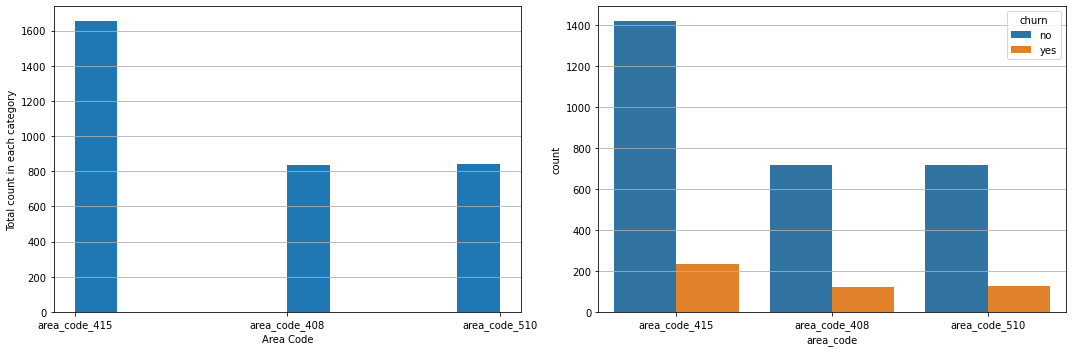

In [22]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.hist(trainer['area_code'])
plt.xlabel('Area Code')
plt.ylabel('Total count in each category')
plt.grid(axis='y')


plt.subplot(1, 2, 2)
sns.countplot(data=trainer, x=trainer.area_code, hue='churn')
plt.grid(axis='y')

plt.tight_layout()
plt.show

### voice_mail_plan

<function matplotlib.pyplot.show(close=None, block=None)>

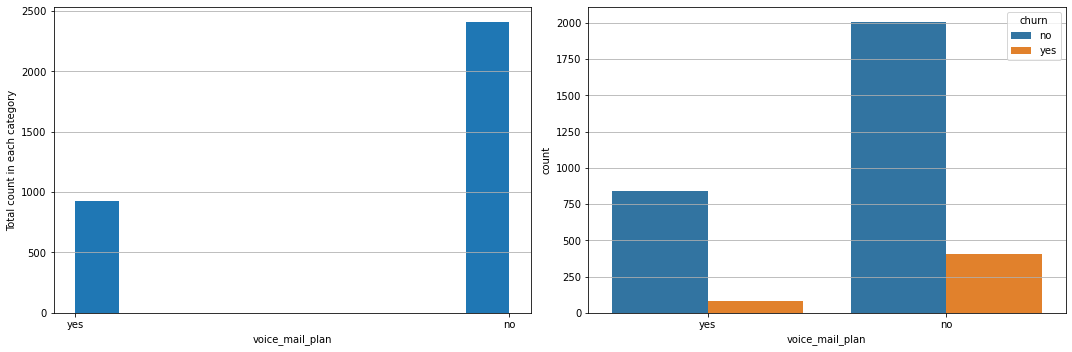

In [23]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.hist(trainer['voice_mail_plan'])
plt.xlabel('voice_mail_plan')
plt.ylabel('Total count in each category')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
sns.countplot(data=trainer, x=trainer.voice_mail_plan, hue='churn')
plt.grid(axis='y')

plt.tight_layout()
plt.show

### International_plan

<function matplotlib.pyplot.show(close=None, block=None)>

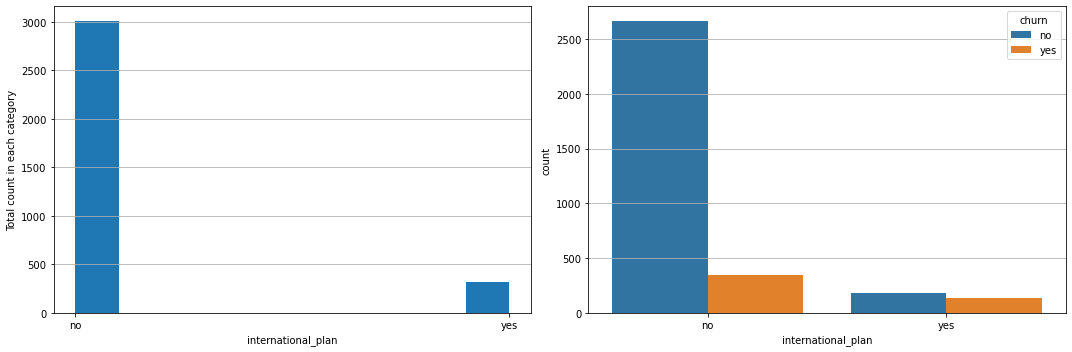

In [24]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.hist(trainer['international_plan'])
plt.xlabel('international_plan')
plt.ylabel('Total count in each category')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
sns.countplot(data=trainer, x=trainer.international_plan, hue='churn')
plt.grid(axis='y')

plt.tight_layout()
plt.show

**Insight:** Churn is high among user with International plan

### State

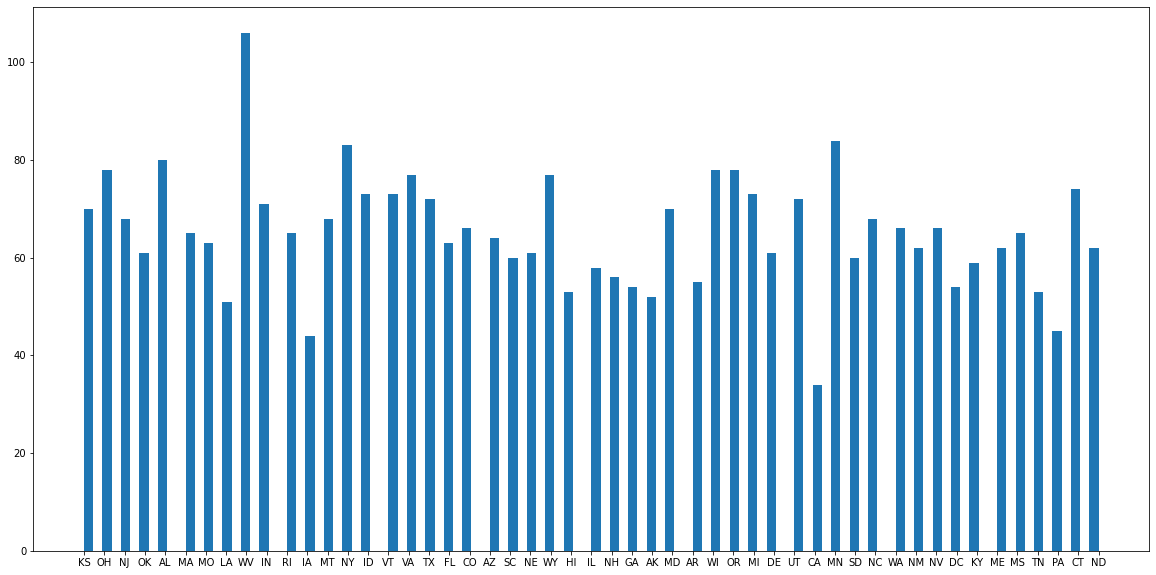

In [25]:
plt.figure(figsize=(20,10))
plt.hist(df['state'], bins=110)
plt.show()

<AxesSubplot:xlabel='state', ylabel='count'>

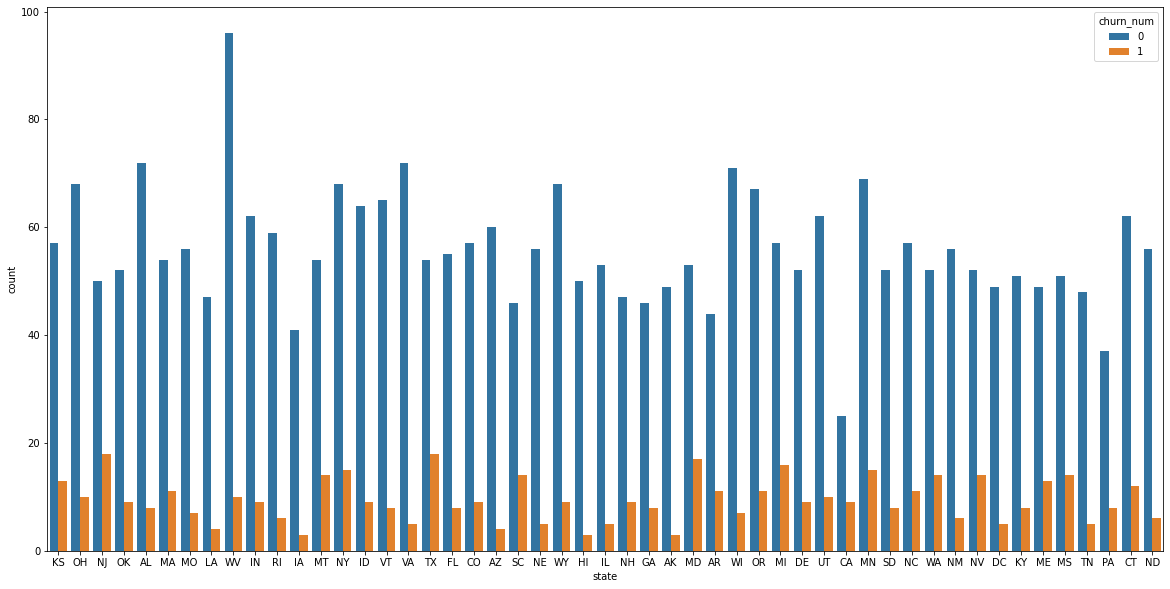

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x=df.state, hue='churn_num')

### Churn

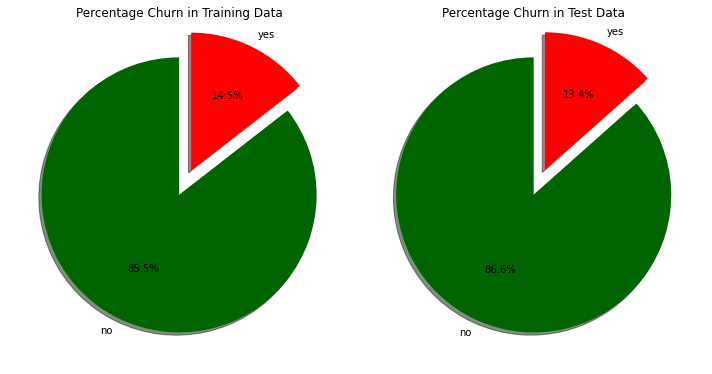

In [27]:
plt.figure(figsize=(10,6))
colorss = ['darkgreen', 'red']

train_topie = trainer['churn'].value_counts(sort=True)
test_topie = tester['churn'].value_counts(sort=True)

plt.subplot(1, 2, 1)
plt.pie(train_topie, labels=train_topie.index.values, explode = [0,0.2], colors = colorss, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage Churn in Training Data')

plt.subplot(1, 2, 2)
plt.pie(test_topie, labels=test_topie.index.values, explode = [0,0.2], colors = colorss, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage Churn in Test Data')

plt.tight_layout()
plt.show()

**Insight:** We can see that Data is highly imbalanced, ratio 85:15 approx

In [28]:
df.mean()

account_length                   101.064806
number_vmail_messages              8.099010
total_day_minutes                179.775098
total_day_calls                  100.435644
total_day_charge                  30.562307
total_eve_minutes                200.980348
total_eve_calls                  100.114311
total_eve_charge                  17.083540
total_night_minutes              200.872037
total_night_calls                100.107711
total_night_charge                 9.039325
total_intl_minutes                10.237294
total_intl_calls                   4.479448
total_intl_charge                  2.764581
number_customer_service_calls      1.562856
churn_num                          0.144914
international_plan_num             0.096910
voice_mail_plan_num                0.276628
dtype: float64

#### Univariate Analysis of Continuous variables

In [29]:
#creating a list of continuous variables, which would be visualized using boxplot
continuous_vars = trainer.select_dtypes([np.number]).columns.tolist()
print(continuous_vars)
len(continuous_vars)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


15

In [30]:
# 'number_vmail_messages'
# 'number_customer_service_calls'

In [31]:
dict_lst = {'calls_var': ['total_day_calls', 'total_eve_calls', 'total_night_calls'], 
            'minutes_var' : ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes'],
            'charge_var' : ['total_day_charge', 'total_eve_charge', 'total_night_charge']}

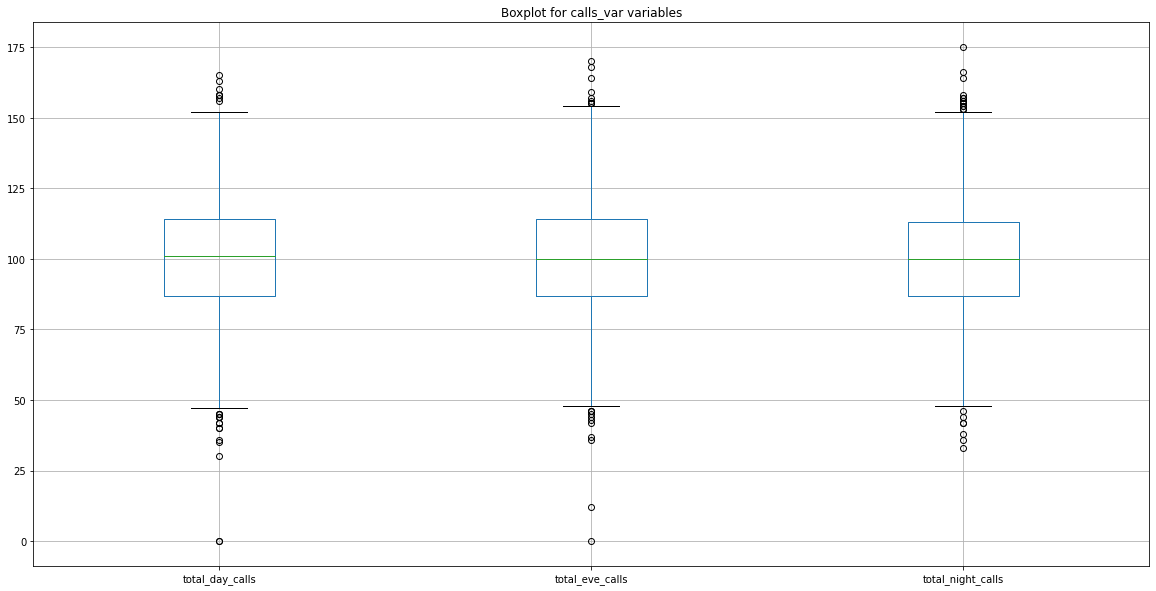

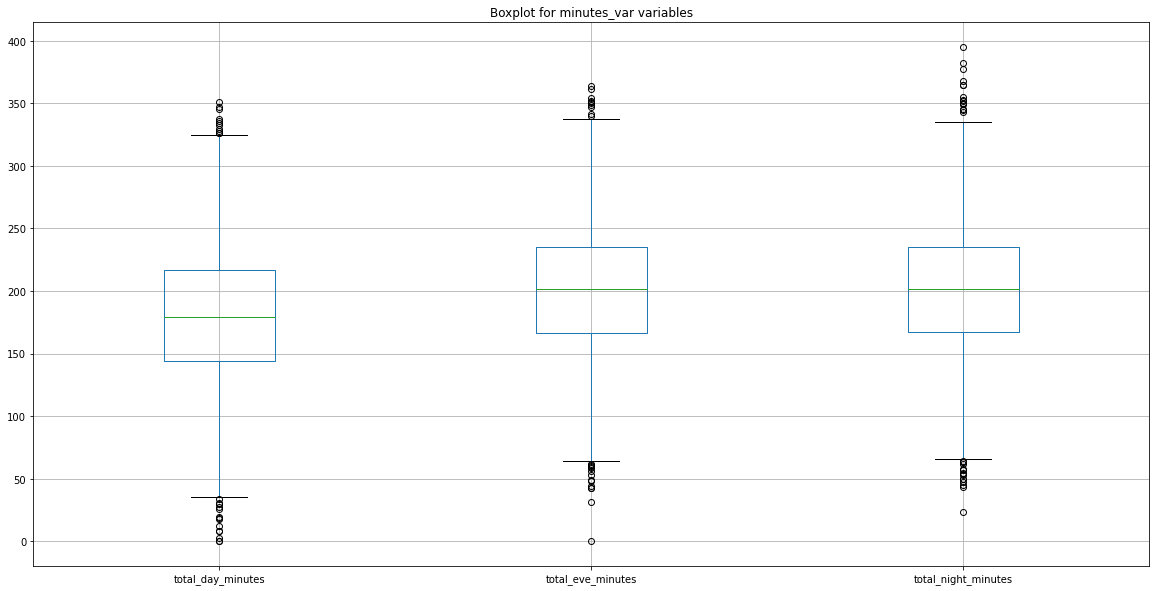

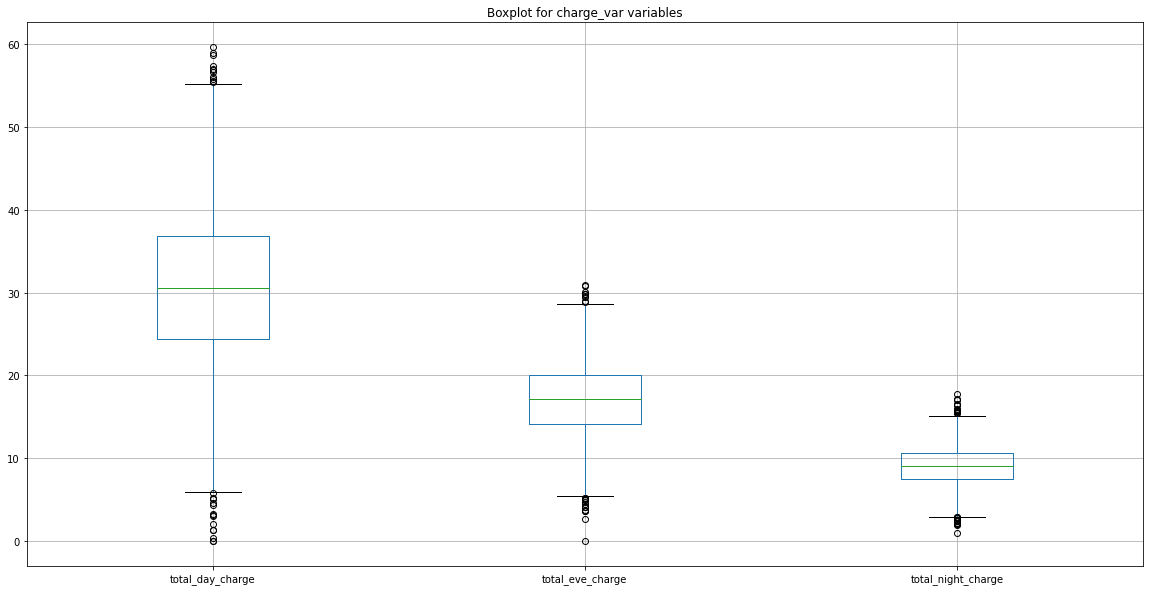

In [32]:
for item in dict_lst:
    df.boxplot(column= dict_lst[item], figsize=(20,10))
    plt.title('Boxplot for '+ str(item)+ ' variables')
    plt.show()

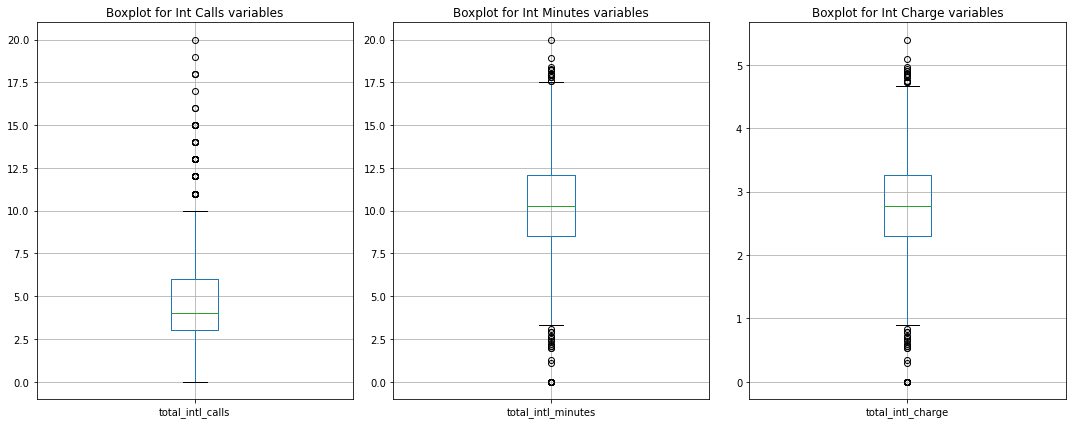

In [33]:
plt.figure(figsize=(15,6))

plt.subplot(1, 3, 1)
df.boxplot(column='total_intl_calls')
plt.title('Boxplot for Int Calls variables')

plt.subplot(1, 3, 2)
df.boxplot(column='total_intl_minutes')
plt.title('Boxplot for Int Minutes variables')

plt.subplot(1, 3, 3)
df.boxplot(column='total_intl_charge')
plt.title('Boxplot for Int Charge variables')


plt.tight_layout()
plt.show()

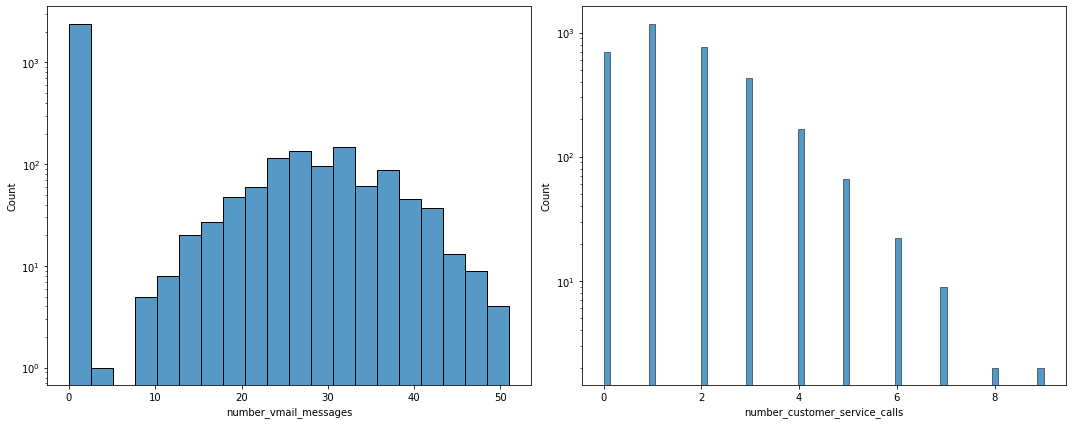

In [34]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x = df.number_vmail_messages)
plt.yscale('log', nonpositive='clip')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x = df.number_customer_service_calls)
plt.yscale('log', nonpositive='clip')

plt.tight_layout()
plt.show()

<h2> Bivariate Analysis</h2>

### Feature Creation

In [35]:
#creating a charge per minute variable in both training and test data
#Intuitively, we expect customer with high value of this variable to have higher churn rate
charge_vars = [x for x in trainer.columns if 'charge' in x]
minutes_vars = [x for x in trainer.columns if 'minutes' in x]
print(charge_vars)
print(minutes_vars)


def create_cpm(df):
    df['total_charges'] = 0
    df["total_minutes"] = 0
    
    for i in range(0, len(charge_vars)):
        df['total_charges'] += df[charge_vars[i]]
        df['total_minutes'] += df[minutes_vars[i]]
    df['charge_per_minute'] = np.where(df['total_minutes'] >0, df['total_charges']/df['total_minutes'], 0)
    df.drop(['total_charges', 'total_minutes'], axis = 1, inplace = True)
    print(df['charge_per_minute'].describe())
    return df

['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']


In [36]:
create_cpm(df)
print('*'*90)
print('*'*90)
create_cpm(test)

count    3333.000000
mean        0.100354
std         0.008440
min         0.066950
25%         0.094893
50%         0.100385
75%         0.106056
max         0.129791
Name: charge_per_minute, dtype: float64
******************************************************************************************
******************************************************************************************
count    1667.000000
mean        0.100772
std         0.008091
min         0.071362
25%         0.095293
50%         0.100634
75%         0.105932
max         0.128430
Name: charge_per_minute, dtype: float64


state  account_length      area_code  number_vmail_messages  \
0       HI             101  area_code_510                      0   
1       MT             137  area_code_510                      0   
2       OH             103  area_code_408                     29   
3       NM              99  area_code_415                      0   
4       SC             108  area_code_415                      0   
...    ...             ...            ...                    ...   
1662    HI              50  area_code_408                     40   
1663    WV             152  area_code_415                      0   
1664    DC              61  area_code_415                      0   
1665    DC             109  area_code_510                      0   
1666    VT              86  area_code_415                     34   

      total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0                  70.9              123             12.05              211.9   
1                 223.6               86             38.01              244.8   
2                 294.7               95             50.10              237.3   
3                 216.8              123             36.86              126.4   
4                 197.4               78             33.56              124.0   
...                 ...              ...               ...                ...   
1662              235.7              127             40.07              223.0   
1663              184.2               90             31.31              256.8   
1664              140.6               89             23.90              172.8   
1665              188.8               67             32.10              171.7   
1666              129.4              102             22.00              267.1   

      total_eve_calls  total_eve_charge  ...  total_night_calls  \
0                  73             18.01  ...                 73   
1                 139             20.81  ...                 81   
2                 105             20.17  ...                127   
3                  88             10.74  ...                 82   
4                 101             10.54  ...                107   
...               ...               ...  ...                ...   
1662              126             18.96  ...                116   
1663               73             21.83  ...                113   
1664              128             14.69  ...                 97   
1665               92             14.59  ...                 89   
1666              104             22.70  ...                100   

      total_night_charge  total_intl_minutes  total_intl_calls  \
0                  10.62                10.6                 3   
1                   4.24                 9.5                 7   
2                  13.51                13.7                 6   
3                   9.93                15.7                 2   
4                   9.20                 7.7                 4   
...                  ...                 ...               ...   
1662               13.39                 9.9                 5   
1663                9.61                14.7                 2   
1664                9.56                13.6                 4   
1665               10.10                 8.5                 6   
1666                6.97                 9.3                16   

      total_intl_charge  number_customer_service_calls  churn_num  \
0                  2.86                              3          0   
1                  2.57                              0          0   
2                  3.70                              1          0   
3                  4.24                              1          0   
4                  2.08                              2          0   
...                 ...                            ...        ...   
1662               2.67                              2          0   
1663               3.97                              3          1

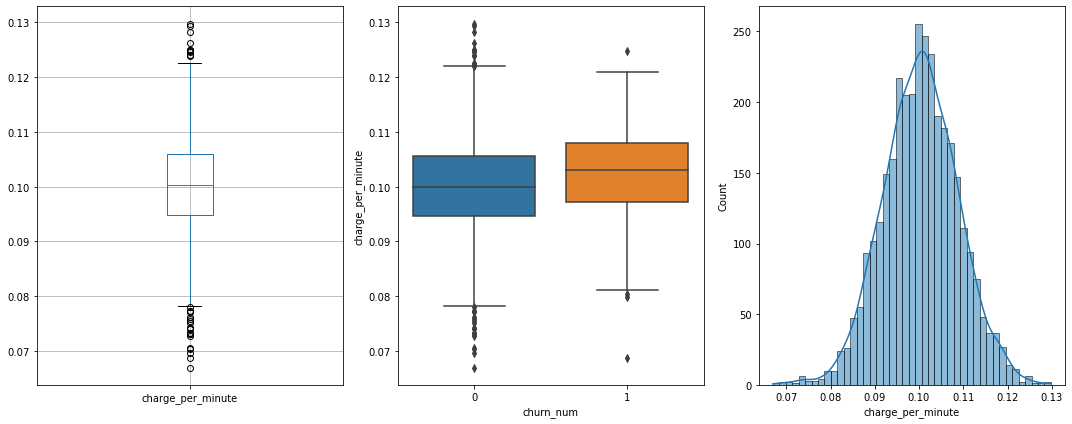

In [37]:
#boxplot of charge per minute variable
plt.figure(figsize=(15,6))

plt.subplot(1, 3, 1)
df.boxplot(column='charge_per_minute')

plt.subplot(1, 3, 2)
sns.boxplot(data= df, y = df.charge_per_minute, x = df.churn_num)

plt.subplot(1,3,3)
sns.histplot(data =df, x = df.charge_per_minute, kde=True)

plt.tight_layout()
plt.show()

In [38]:
X = df.drop('churn_num', axis = 1)

In [39]:
all_corr = X.corr().unstack().reset_index()
corr_table = all_corr[all_corr['level_0'] > all_corr['level_1']]
corr_table.columns = ['var1', 'var2', 'corr_value']
corr_table['corr_abs'] = corr_table['corr_value'].abs()
corr_table = corr_table.sort_values(by = ['corr_abs'], ascending = False)
corr_table.head(10)

<ipython-input-39-a7ccbba7dc13>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_table['corr_abs'] = corr_table['corr_value'].abs()


var1                   var2  corr_value  corr_abs
40     total_day_minutes       total_day_charge    1.000000  1.000000
97     total_eve_minutes       total_eve_charge    1.000000  1.000000
154  total_night_minutes     total_night_charge    0.999999  0.999999
211   total_intl_minutes      total_intl_charge    0.999993  0.999993
289  voice_mail_plan_num  number_vmail_messages    0.956927  0.956927
53     total_day_minutes      charge_per_minute    0.779747  0.779747
89      total_day_charge      charge_per_minute    0.779747  0.779747
197   total_night_charge      charge_per_minute   -0.569728  0.569728
161  total_night_minutes      charge_per_minute   -0.569703  0.569703
143     total_eve_charge      charge_per_minute   -0.149398  0.149398

**Insight:** <br>
- We can see that **'total_day_charge'**, **'total_eve_charge'**, **'total_night_charge'**, **'total_intl_charge'** and **number_vmail_messages** are highly correlated with **'total_day_minute'**, **'total_eve_minutes'**, **'total_night_minutes'**, **'total_intl_minutes'** and **voice_mail_plan_num** respectively.
<br></br>
- These 5 variables **'total_day_charge'**, **'total_eve_charge'**, **'total_night_charge'**, **'total_intl_charge'** and **voice_mail_plan_num** can be dropped.

<AxesSubplot:>

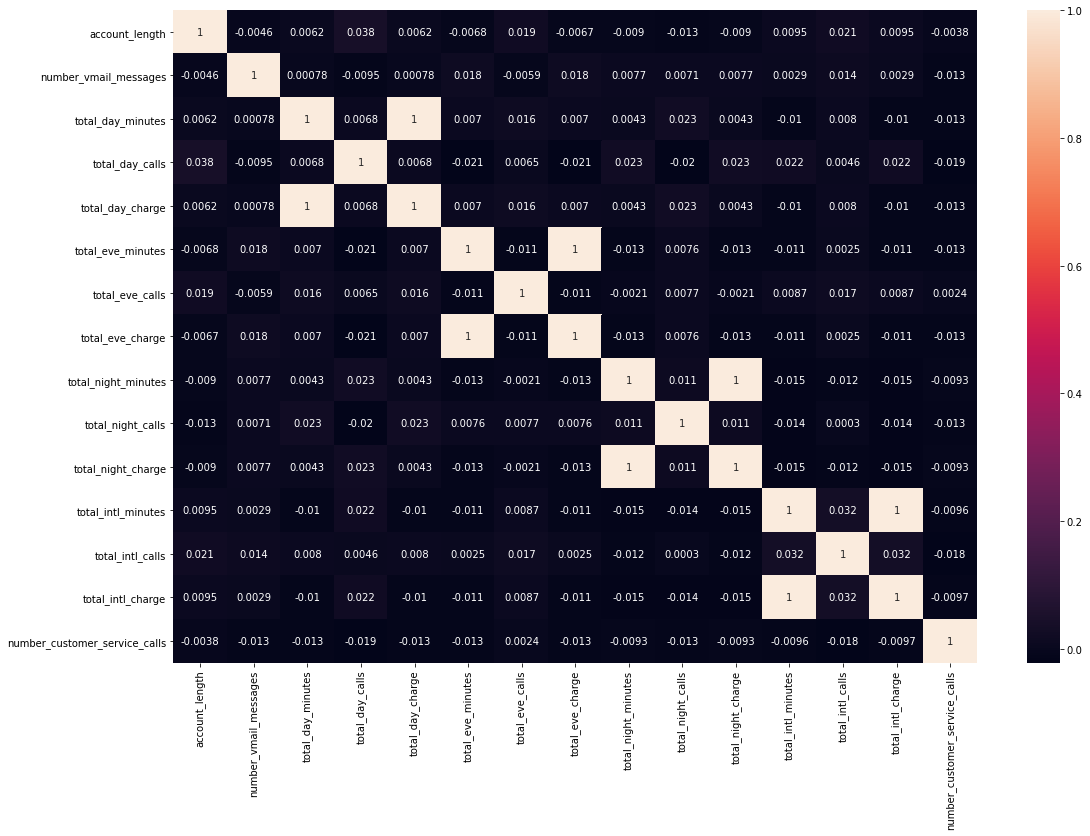

In [40]:
#creating a heat map to see the degree of correlation visually
plt.figure(figsize=(18, 12))
sns.heatmap(df[continuous_vars].corr(), annot = True)

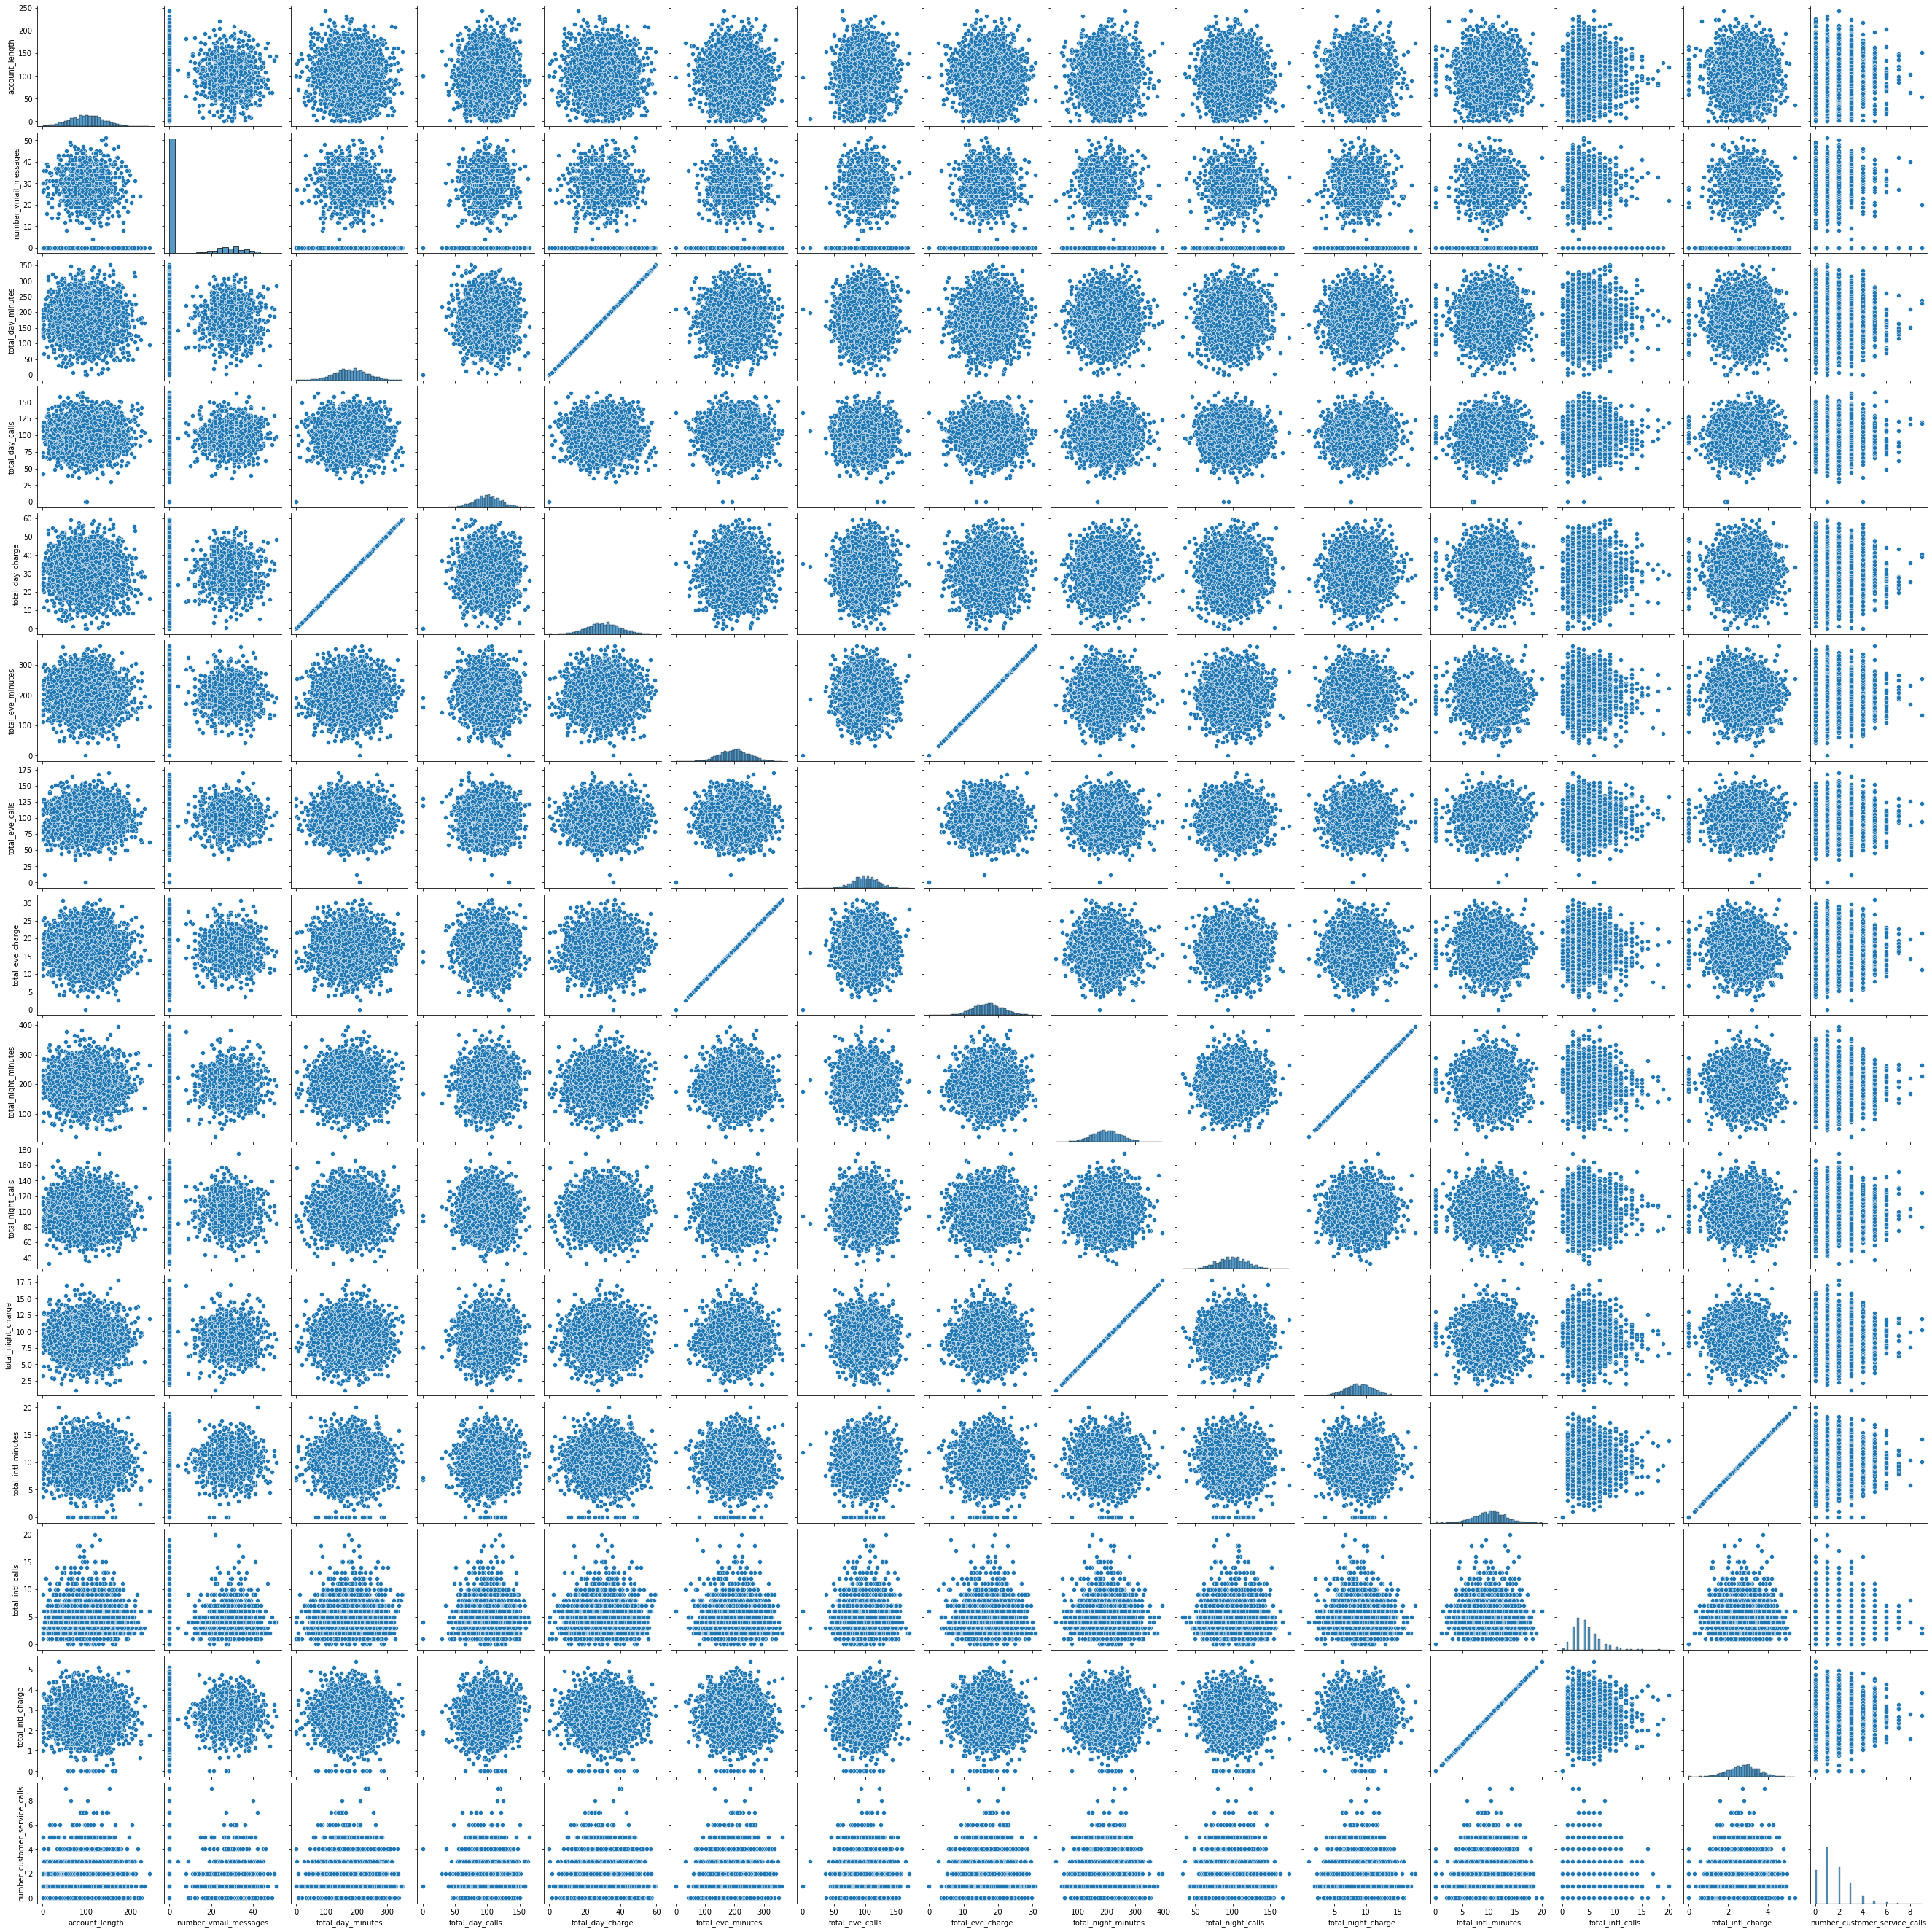

In [41]:
# PLotting each variable against the other..the diagonals show the histogram
sns.pairplot(df[continuous_vars])

In [42]:
#plotting PDF of all the Variables based on churn
def create_pdf(df, varname):
    plt.figure(figsize=(20,5))
    plt.hist(x = df[df['churn_num'] == 0][varname], bins = 50, label = 'Non- Churned', density = True, facecolor = 'g', alpha = 0.8)
    plt.hist(x = df[df['churn_num'] == 1][varname], bins = 50, label = 'Churned', density = True, facecolor = 'b', alpha = 0.6)
    plt.legend(loc = 'upper right')
    plt.xlabel(varname)
    plt.ylabel('Probability Distribution Function')
    plt.show()

In [43]:
continuous_vars

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

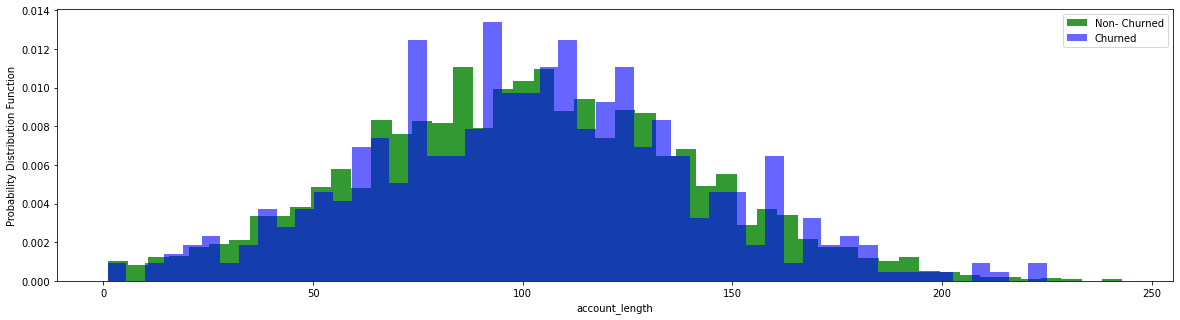

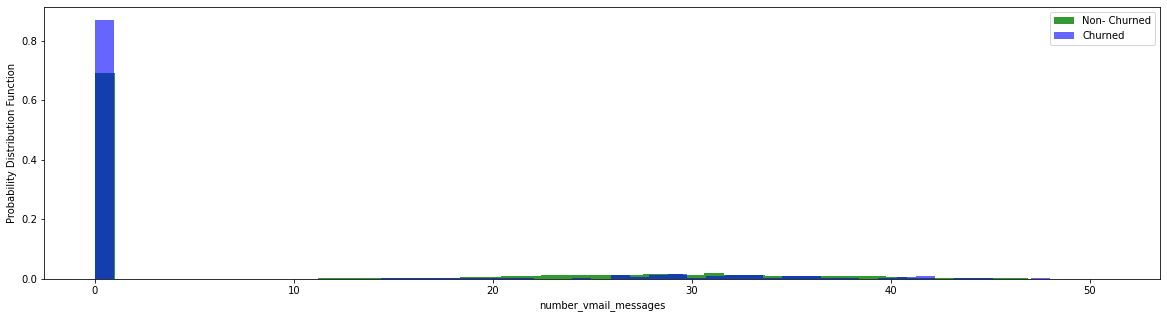

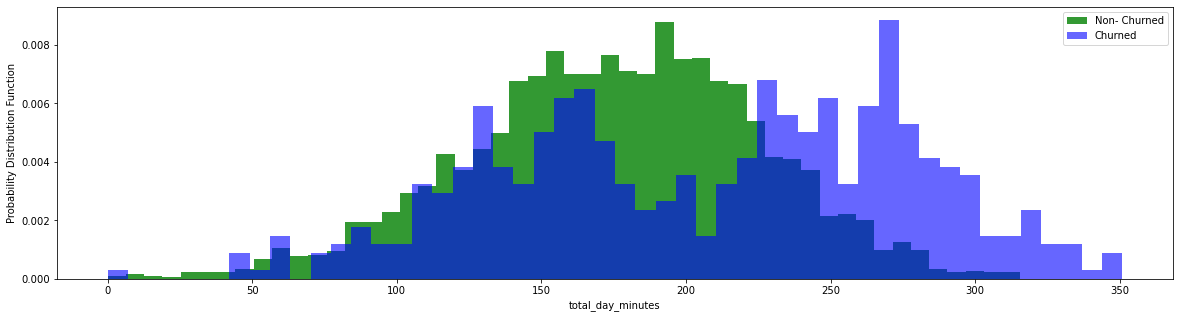

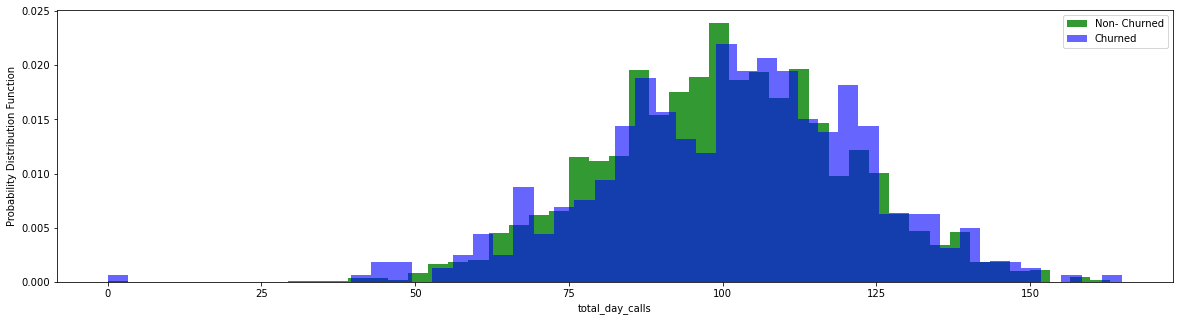

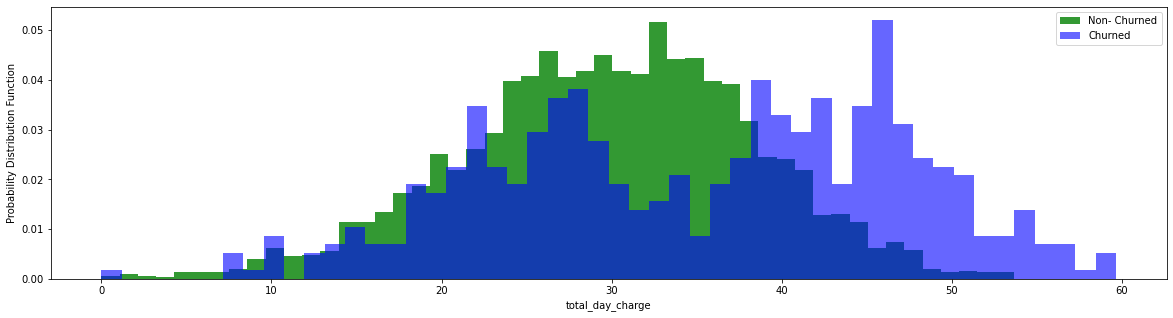

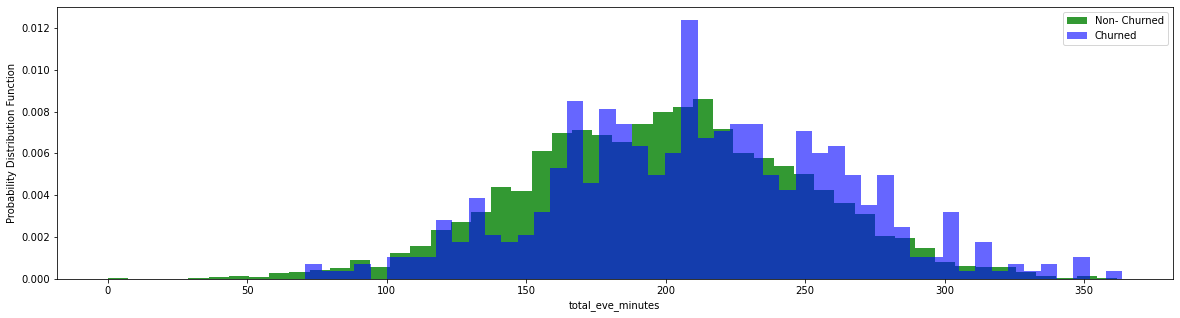

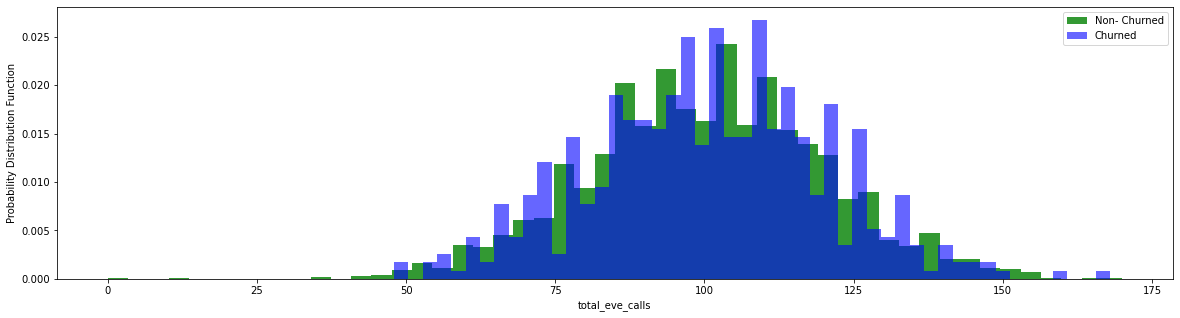

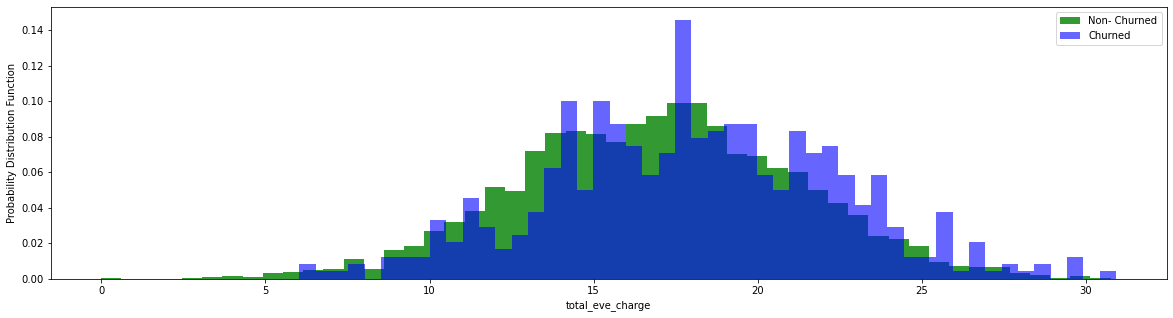

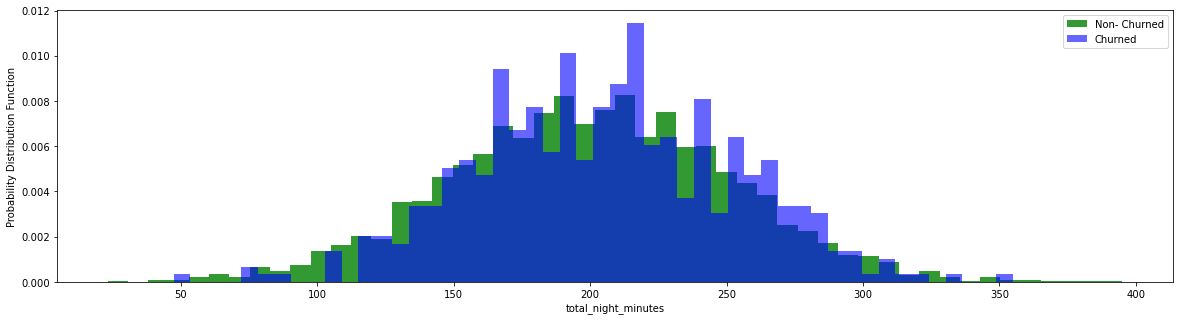

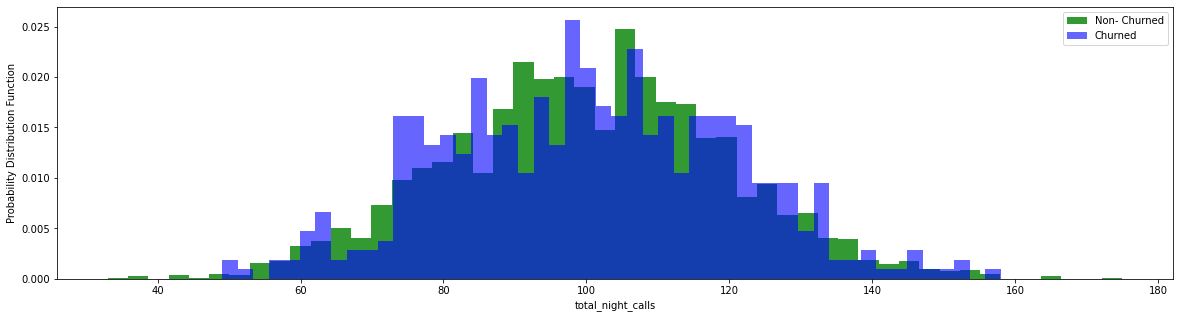

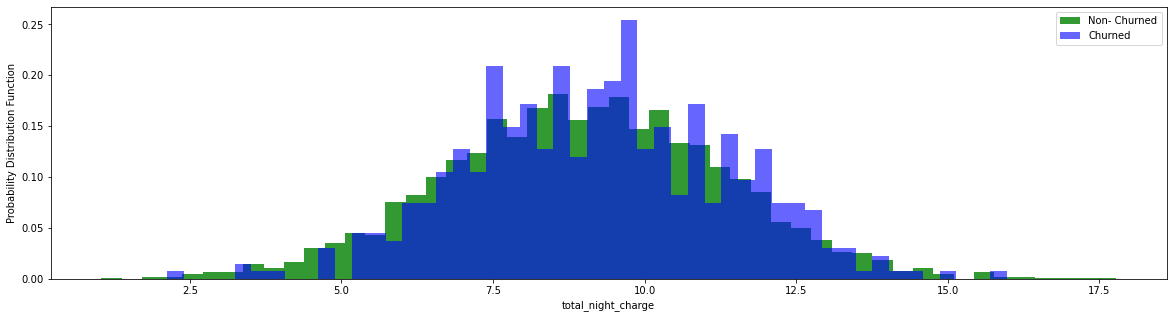

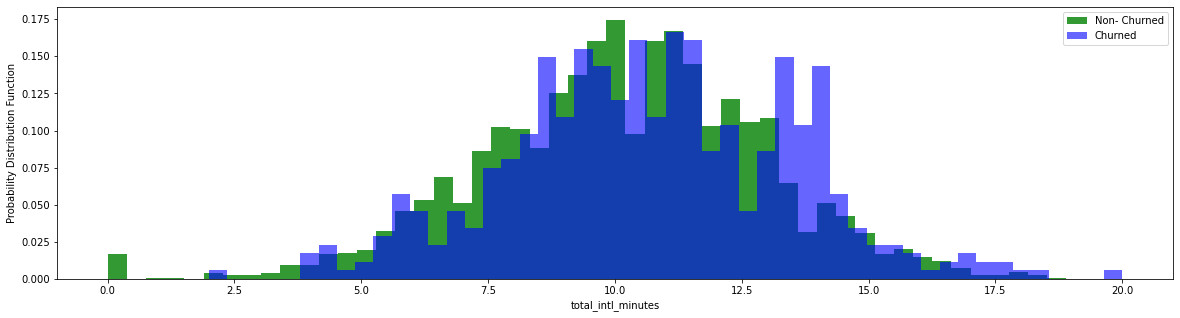

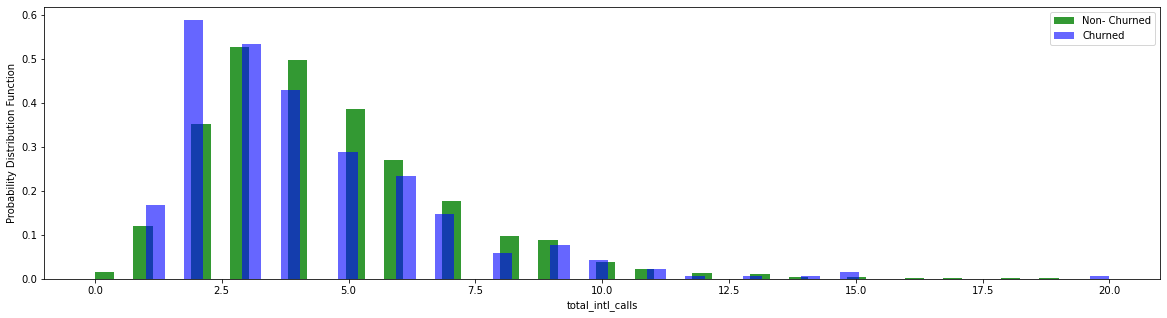

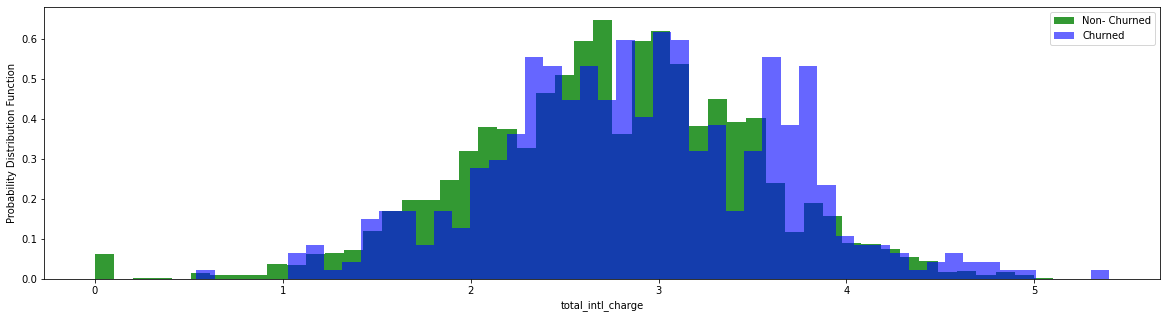

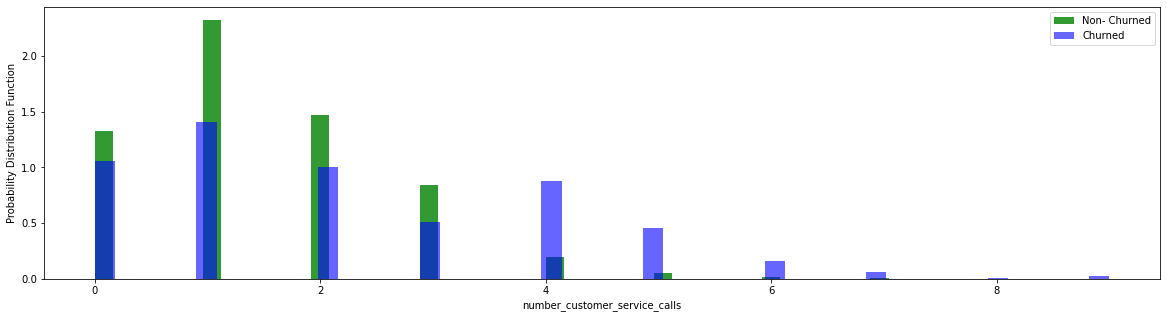

In [44]:
for varname in continuous_vars:
    create_pdf(df, varname)

**Insight:** <br>
 - Customers tend to churn more when the total day charge exceeds more than *$40*
 - Customers with more than 2.5 international calls tend to churn more.
 - Customer with less than 2 customer service calls are also churning more.

# Final Data Cleaning

In [45]:
#we have identified 5 variables that can be dropped
df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'voice_mail_plan_num'], axis = 1, inplace = True)
test.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'voice_mail_plan_num'], axis = 1, inplace = True)

In [46]:
#doing ohe of the 2 categorical varables 
cat_columns = ['state', 'area_code']
df = pd.concat([df, pd.get_dummies(df[cat_columns], drop_first = True)], axis = 1)
test = pd.concat([test, pd.get_dummies(test[cat_columns], drop_first= True)], axis = 1)

In [47]:
#dropping columns that has been one hot encoded
df.drop(cat_columns, axis = 1, inplace=True)
test.drop(cat_columns, axis = 1, inplace=True)

In [48]:
print(df.shape)
print(test.shape)

(3333, 66)
(1667, 66)


## Saving this dataset

In [49]:
df.to_csv('final_train_data.csv', index=False)

In [50]:
test.to_csv('final_test_data.csv', index = False)

# Questions

1 > Data Scaling <br>
2> Imbalanced classes were not handeled <br>
3> Is this always necessary to balance the classes in classififcation problems in case of imbalanced classes? If a model is giving higher value of precision and recall i.e. a good tradeoff between precision and recall, then can this model be considered a good model if it is trained on imbalanced dataset?<br>
4> In model building part, in LR why did we selected 1 st column **lr_best.predict_proba(X_test)[:, 1]**, why not 0th column <br>
5> PCA implementation
